# **Project 2**, APS1070 Winter 2022
**Anomaly Detection Algorithm using Gaussian Mixture Model**

**Deadline: Feb 28, 11 PM - 14 points**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:


*   Name: Steven Xie Zuoqi
*   Student Number: 998979627

### How to submit **(HTML + IPYNB)**

1. Download your notebook: `File -> Download .ipynb`

2. Click on the Files icon on the far left menu of Colab

3. Select & upload your `.ipynb` file you just downloaded, and then obtain its path (right click) (you might need to hit the Refresh button before your file shows up)


4. execute the following in a Colab cell:
```
%%shell
jupyter nbconvert --to html /PATH/TO/YOUR/NOTEBOOKFILE.ipynb
```

5. An HTML version of your notebook will appear in the files, so you can download it.

6. Submit **both** <font color='red'>`HTML` and `IPYNB`</font>  files on Quercus for grading.



Ref: https://stackoverflow.com/a/64487858 



##**Part 1: Getting started [2 Marks]**

We are going to work with a credit card fraud dataset. This dataset contains 28 key features, which are not 
directly interpretable but contain meaningful information about the dataset.

Load the dataset in CSV file using Pandas. The dataset is called `creditcard.csv`. Print out the first few columns of the dataset.

* How many rows are there? 284807 **[0.1]**
* What features in the dataset are present aside from the 28 main features?  Time,Amount,Class **[0.1]**
* Which column contains the targets? Column 31, the 'Class' feature **[0.1]**
* What is the meaning of target values? 0 means not a fraud, 1 means fraud **[0.1]**

In [1]:
pip install wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=c6c8321d9b98f3b8ff9f70125d8dbe0e9992871444d4bc52ce281c237b68c65f
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [2]:
import wget

wget.download('https://github.com/aps1070-2019/datasets/raw/master/creditcard.tar.gz','creditcard.tar.gz')

'creditcard.tar.gz'

In [3]:
!tar -zxvf creditcard.tar.gz

creditcard.csv


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
df = pd.read_csv('creditcard.csv')

In [5]:
### YOUR CODE HERE ###
df.info

<bound method DataFrame.info of             Time         V1         V2  ...       V28  Amount  Class
0            0.0  -1.359807  -0.072781  ... -0.021053  149.62      0
1            0.0   1.191857   0.266151  ...  0.014724    2.69      0
2            1.0  -1.358354  -1.340163  ... -0.059752  378.66      0
3            1.0  -0.966272  -0.185226  ...  0.061458  123.50      0
4            2.0  -1.158233   0.877737  ...  0.215153   69.99      0
...          ...        ...        ...  ...       ...     ...    ...
284802  172786.0 -11.881118  10.071785  ...  0.823731    0.77      0
284803  172787.0  -0.732789  -0.055080  ... -0.053527   24.79      0
284804  172788.0   1.919565  -0.301254  ... -0.026561   67.88      0
284805  172788.0  -0.240440   0.530483  ...  0.104533   10.00      0
284806  172792.0  -0.533413  -0.189733  ...  0.013649  217.00      0

[284807 rows x 31 columns]>

In [6]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [7]:
df.head(50)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


It's important to know how many examples we have for each class when we work with a new dataset.

* What is the percentage of entries in the dataset for each class? 

Class 1: 0.1727485630620034% 

Class 0: 99.82725143693798% **[0.1]**
* Is this data considered balanced or unbalanced? Why is this the case?

The data is considered unbalanced because there are only 492 rows of Class 1 data but 284315 rows of Class 0 data. **[0.1]**
* Why is balance/imbalance important? How might this class ditribution affect a KNN classifier for example, which we explored in Project 1?  

Many machine learning algorithms are designed to maximize overall accuracy. For imbalanced dataset, the model trained may just outbuts the majority class for the maximun accuracy. For an unbalanced dataset, the minority class is very hard to detect. Therefore, it will be very difficult for the trained KNN model to detect any minority class. **[0.5]**
* What metrics should we use to evaluate a model in such cases? 

Confusion matrix, Precision, Recall, F1-Score **[0.2]**


In [8]:
class_1 = len(df[df['Class']== 1])
class_0 = len(df[df['Class']== 0])
print("For class 1, percentage: ", (class_1)/(class_0+ class_1)*100)
print("For class 0, percentage: ", class_0/(class_0+class_1)*100)

For class 1, percentage:  0.1727485630620034
For class 0, percentage:  99.82725143693798


Next, split the dataset into a training (65%), validation (20%) and testing set (15%). Set the random state to 40. **[0.2]**

Make sure to separate out the column corresponding to the targets.

In [9]:
X = df.loc[:,df.columns !='Class']
y = df['Class']

In [10]:
### Split the data  ###

X_train, X_val, X_test, y_train, y_val, y_test = 0, 0, 0, 0, 0, 0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=40)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=4/17, random_state=40) 

Now, let's take a look at the difference in distribution for some variables between fraudulent and non-fraudulent transactions:

In [11]:
features=[f for f in df.columns if 'V' in f]
print(features)

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']


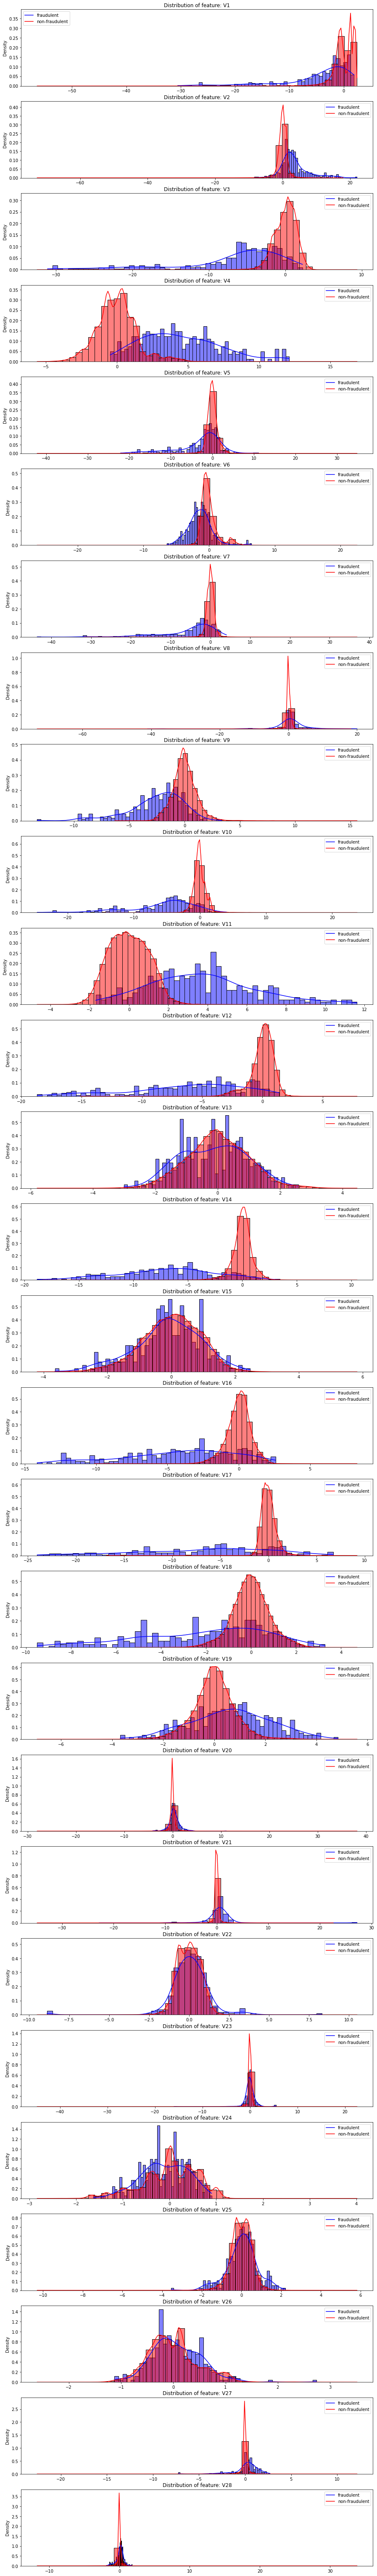

In [148]:
import matplotlib.gridspec as gridspec
features=[f for f in df.columns if 'V' in f]
nplots=np.size(features)
plt.figure(figsize=(15,4*nplots))
gs = gridspec.GridSpec(nplots,1)
for i, feat in enumerate(features):
    ax = plt.subplot(gs[i])
    sns.histplot(X_train[feat][y_train==1], stat="density", kde=True, color="blue", bins=50)
    sns.histplot(X_train[feat][y_train==0], stat="density", kde=True, color="red", bins=50)
    ax.legend(['fraudulent', 'non-fraudulent'],loc='best')
    ax.set_xlabel('')
    ax.set_title('Distribution of feature: ' + feat)

Explain how these graphs could provide meaningful information about anomaly detection using a gaussian model. **[0.5]**

These graphs shows the distribution of each V features for fraud and non-fraud transactions. For some features, the distribution overlaps too much for fraud and non-fraud transactions, so it's hard to detect a fraud using these features. We should choose some features that have different distributions for fraud and non-fraud transactions. (V3,V4,V5,V10,V11,V12,V13,V17,V18,V19)

## **Part 2: One Gaussian model with Single feature: [2 Marks]**
We'll start by making a prediction using **a single feature of our dataset at a time**. 

Please note that we **only use `V` features** in our model.

**a. Fitting regardless of class:**
  1. Fit a single Gaussian distribution on a single feature of **the full training dataset** (both classes) using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. 
  2. Compute AUC (Area under the ROC Curve) based on ``sklearn.mixture.GaussianMixture.score_samples`` on both the full training set and validation set (including both classes).  
  3. Repeat the above steps for each of the features and present your findings in a table. **[0.3]**
  4. Find the best 3 features to distinguish fraudulent transactions from non-fraudulent transactions based on the AUC of the validation set. **[0.2]**
  Answer: 
  
          V14	0.948014	0.955065

          V17	0.928937	0.925698

          V10	0.910025	0.917279

  5. Make a prediction based on a model's scores: If the `score_samples` is lower than a threshold, we consider that transaction as a fraud. Find an optimal threshold that maximizes the F1 Score of the validation set for each of those 3 features separately. (Do not check every possible value for threshold, come up with a faster way!) Compute F1 score using `sklearn.metrics.f1_score`. **[0.5]**
 
 For V14: best threshold  -19.241684335652995  	

  For V17 best threshold   -22.354357718216683  	 

  For V10: For threshold   -28.531554724190183 	 

  6. Report Precision, Recall and F1 score on both training and validation set in a table using the threshold you found in previous step. 

  67. Report the complexity of your method (Big O notation) for determining the optimal threshold.**[0.3]**

iteration: r values in threshold list for loop

sorted function: nlog(n)

f1_score funciton: n

So, the big O is O(rnlog(n))


**b. Fitting based on class:**
 1. Pick 3 features that had the best AUC in Part 2a. 
 2. repeat part 2a to compute AUC, F1 score, Precision and Recall when you fit a Gaussian **only on non-fraudulent transactions in the training set** in step 1 (instead of all the transactions).
 3. Compare your results from parts 2a and 2b in a table (for both training and validation set). **[0.2]**
 4. Are these results different or similar? Why?**[0.5]**

 results are very similar, because the majority of the dataset is Class 0, fitting on only Class 0 data is not much different from fitting on the full training datset. 


In [12]:
### YOUR CODE HERE ###
from sklearn.metrics import roc_curve
from sklearn.mixture import GaussianMixture
from sklearn.metrics import roc_auc_score
features=[f for f in df.columns if 'V' in f]
scores = []
for feat in enumerate(features):
  gm = GaussianMixture(n_components=1)
  gm.fit(X_train.loc[:,X_train.columns == feat[-1]])
  p_X_train = gm.score_samples(X_train.loc[:,X_train.columns ==feat[-1]])
  p_X_val = gm.score_samples(X_val.loc[:,X_val.columns ==feat[-1]])
  train_scores = roc_auc_score(y_train, -1 * p_X_train)
  val_scores = roc_auc_score(y_val, -1* p_X_val)
  scores.append([feat[-1],train_scores,val_scores])

table_scores = pd.DataFrame(scores)
table_scores.columns = ['featrues','train_scores','val_scores']
table_scores

,featrues,train_scores,val_scores
0,V1,0.692540,0.716118
1,V2,0.848245,0.852456
2,V3,0.870004,0.856759
3,V4,0.889715,0.883280
4,V5,0.761153,0.781160
5,V6,0.727997,0.721413
6,V7,0.865497,0.887163
7,V8,0.774903,0.790317
8,V9,0.799279,0.794323
9,V10,0.910025,0.917279


In [13]:
table_scores.sort_values(by=['val_scores'],ascending=0)

,featrues,train_scores,val_scores
13,V14,0.948014,0.955065
16,V17,0.928937,0.925698
9,V10,0.910025,0.917279
15,V16,0.896384,0.896325
11,V12,0.911908,0.892862
6,V7,0.865497,0.887163
3,V4,0.889715,0.883280
10,V11,0.899131,0.880086
20,V21,0.812968,0.861376
2,V3,0.870004,0.856759


In [14]:
best_features = ['V14','V17','V10']

In [15]:
gm_V14 = GaussianMixture(n_components=1)
gm_V14.fit(X_train.loc[:,X_train.columns == 'V14'])
p_val_V14 = gm_V14.score_samples(X_val.loc[:,X_val.columns =='V14'])
expected = int(len(p_val_V14)*0.001727485630620034)
print(expected)
print(p_val_V14)

98
[-1.7913815  -0.95527258 -1.66043885 ... -0.87714303 -1.09392415
 -1.15040102]


In [16]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# The number of fraud should be around 98 for validation dataset, so we check for threshold value correspond to the sorted p_val around 98
for i in [50,60,70,80,90,93,94,95,96,97,98,99,100,101,102,103,110,120,130,140,150]:
   tr = sorted(p_val_V14)[i]
   precision = precision_score(y_val, p_val_V14 < tr) #Here, we compare y_train labels to our picks using precision
   recall = recall_score(y_val, p_val_V14 < tr) #Here, we compare y_train labels to our picks using recall
   f1 = f1_score(y_val , p_val_V14 < tr)
   print('For threshold of ',tr,' \t precision: ', '%.3f' % precision,' recall: ', '%.3f' % recall, 'f1:','%.3f' %f1)  

For threshold of  -31.775561324207384  	 precision:  0.820  recall:  0.402 f1: 0.539
For threshold of  -28.731083221159132  	 precision:  0.767  recall:  0.451 f1: 0.568
For threshold of  -26.630861816194262  	 precision:  0.714  recall:  0.490 f1: 0.581
For threshold of  -23.13513109475554  	 precision:  0.650  recall:  0.510 f1: 0.571
For threshold of  -20.274387773640914  	 precision:  0.644  recall:  0.569 f1: 0.604
For threshold of  -19.512924816518844  	 precision:  0.634  recall:  0.578 f1: 0.605
For threshold of  -19.449199244710677  	 precision:  0.638  recall:  0.588 f1: 0.612
For threshold of  -19.241684335652995  	 precision:  0.642  recall:  0.598 f1: 0.619
For threshold of  -19.17891482296966  	 precision:  0.635  recall:  0.598 f1: 0.616
For threshold of  -18.240336117956193  	 precision:  0.629  recall:  0.598 f1: 0.613
For threshold of  -18.12541712658163  	 precision:  0.622  recall:  0.598 f1: 0.610
For threshold of  -18.00274835545388  	 precision:  0.616  recall:  

In [17]:
gm_V17 = GaussianMixture(n_components=1)
gm_V17.fit(X_train.loc[:,X_train.columns == 'V17'])
p_val_V17 = gm_V17.score_samples(X_val.loc[:,X_val.columns =='V17'])
# The number of fraud should be around 98 for validation dataset, so we check for threshold value correspond to the sorted p_val around 98
for i in [50,60,70,80,90,93,94,95,96,97,98,99,100,101,102,103,110,120,130,140,150]:
   tr = sorted(p_val_V17)[i]
   precision = precision_score(y_val, p_val_V17 < tr)
   recall = recall_score(y_val, p_val_V17 < tr)
   f1 = f1_score(y_val , p_val_V17 < tr)
   print('For threshold of ',tr,' \t precision: ', '%.3f' % precision,' recall: ', '%.3f' % recall, 'f1:','%.3f' %f1)  

For threshold of  -32.17832309314056  	 precision:  0.800  recall:  0.392 f1: 0.526
For threshold of  -26.27401986547722  	 precision:  0.750  recall:  0.441 f1: 0.556
For threshold of  -22.354357718216683  	 precision:  0.729  recall:  0.500 f1: 0.593
For threshold of  -19.586558499950076  	 precision:  0.662  recall:  0.520 f1: 0.582
For threshold of  -18.4123922809697  	 precision:  0.622  recall:  0.549 f1: 0.583
For threshold of  -17.45114630858279  	 precision:  0.613  recall:  0.559 f1: 0.585
For threshold of  -16.626563698660565  	 precision:  0.606  recall:  0.559 f1: 0.582
For threshold of  -16.46583785101628  	 precision:  0.600  recall:  0.559 f1: 0.579
For threshold of  -16.442817723067204  	 precision:  0.594  recall:  0.559 f1: 0.576
For threshold of  -16.38874526647951  	 precision:  0.588  recall:  0.559 f1: 0.573
For threshold of  -16.2275526677095  	 precision:  0.582  recall:  0.559 f1: 0.570
For threshold of  -16.109780541398397  	 precision:  0.576  recall:  0.559

In [18]:
gm_V10 = GaussianMixture(n_components=1)
gm_V10.fit(X_train.loc[:,X_train.columns == 'V10'])
p_val_V10 = gm_V10.score_samples(X_val.loc[:,X_val.columns =='V10'])
# The number of fraud should be around 98 for validation dataset, so we check for threshold value correspond to the sorted p_val around 98
for i in [50,60,70,80,90,93,94,95,96,97,98,99,100,101,102,103,110,120,130,140,150]:
   tr = sorted(p_val_V10)[i]
   precision = precision_score(y_val, p_val_V10 < tr)
   recall = recall_score(y_val, p_val_V10 < tr)
   f1 = f1_score(y_val , p_val_V10 < tr)
   print('For threshold of ',tr,' \t precision: ', '%.3f' % precision,' recall: ', '%.3f' % recall, 'f1:','%.3f' %f1)  

For threshold of  -40.277068890550815  	 precision:  0.280  recall:  0.137 f1: 0.184
For threshold of  -37.00046080820342  	 precision:  0.250  recall:  0.147 f1: 0.185
For threshold of  -35.03408881432033  	 precision:  0.229  recall:  0.157 f1: 0.186
For threshold of  -32.977963341709895  	 precision:  0.212  recall:  0.167 f1: 0.187
For threshold of  -31.370064228778872  	 precision:  0.200  recall:  0.176 f1: 0.188
For threshold of  -31.19148065781395  	 precision:  0.204  recall:  0.186 f1: 0.195
For threshold of  -30.99584120792392  	 precision:  0.202  recall:  0.186 f1: 0.194
For threshold of  -30.864210230617307  	 precision:  0.200  recall:  0.186 f1: 0.193
For threshold of  -30.74287911577065  	 precision:  0.198  recall:  0.186 f1: 0.192
For threshold of  -30.645950558538935  	 precision:  0.196  recall:  0.186 f1: 0.191
For threshold of  -30.429756571819432  	 precision:  0.204  recall:  0.196 f1: 0.200
For threshold of  -30.247599348475013  	 precision:  0.202  recall:  0

In [19]:
tr = -19.241684335652995
table = []
for feat in ['V14']:  
  gm = GaussianMixture(n_components=1)
  gm.fit(X_train.loc[:,X_train.columns == feat])
  p_X_train = gm.score_samples(X_train.loc[:,X_train.columns ==feat])
  p_X_val = gm.score_samples(X_val.loc[:,X_val.columns ==feat])
  precision_train = precision_score(y_train,p_X_train < tr)
  recall_train = recall_score(y_train, p_X_train < tr)
  f1_train = f1_score(y_train, p_X_train < tr)
  precision = precision_score(y_val, p_X_val < tr)
  recall = recall_score(y_val, p_X_val < tr)
  f1 = f1_score(y_val , p_X_val < tr)
  
table.append([feat,tr,precision_train,recall_train,f1_train,precision,recall,f1])

In [20]:
tr = -22.354357718216683
for feat in ['V17']:  
  gm = GaussianMixture(n_components=1)
  gm.fit(X_train.loc[:,X_train.columns == feat])
  p_X_train = gm.score_samples(X_train.loc[:,X_train.columns ==feat])
  p_X_val = gm.score_samples(X_val.loc[:,X_val.columns ==feat])
  precision_train = precision_score(y_train,p_X_train < tr)
  recall_train = recall_score(y_train, p_X_train < tr)
  f1_train = f1_score(y_train, p_X_train < tr)
  precision = precision_score(y_val, p_X_val < tr)
  recall = recall_score(y_val, p_X_val < tr)
  f1 = f1_score(y_val , p_X_val < tr)
  
table.append([feat,tr,precision_train,recall_train,f1_train,precision,recall,f1])


In [21]:
tr = -30.031784700967112
for feat in ['V10']:  
  gm = GaussianMixture(n_components=1)
  gm.fit(X_train.loc[:,X_train.columns == feat])
  p_X_train = gm.score_samples(X_train.loc[:,X_train.columns ==feat])
  p_X_val = gm.score_samples(X_val.loc[:,X_val.columns ==feat])
  precision_train = precision_score(y_train,p_X_train < tr)
  recall_train = recall_score(y_train, p_X_train < tr)
  f1_train = f1_score(y_train, p_X_train < tr)
  precision = precision_score(y_val, p_X_val < tr)
  recall = recall_score(y_val, p_X_val < tr)
  f1 = f1_score(y_val , p_X_val < tr)
  
table.append([feat,tr,precision_train,recall_train,f1_train,precision,recall,f1])

In [22]:
table_6 = pd.DataFrame(table)
table_6.columns = ['featrues','best threshold','train_precision','train_recall','train_f1','val_precision','val_recall','val_f1']
table_6

,featrues,best threshold,train_precision,train_recall,train_f1,val_precision,val_recall,val_f1
0,V14,-19.241684,0.622896,0.574534,0.597738,0.642105,0.598039,0.619289
1,V17,-22.354358,0.659751,0.493789,0.564831,0.728571,0.500000,0.593023
2,V10,-30.031785,0.190349,0.220497,0.204317,0.207921,0.205882,0.206897


b. Fitting based on class:

Pick 3 features that had the best AUC in Part 2a.

best_features = ['V14','V17','V10']

repeat part 2a to compute AUC, F1 score, Precision and Recall when you fit a Gaussian only on non-fraudulent transactions in the training set in step 1 (instead of all the transactions).

Compare your results from parts 2a and 2b in a table (for both training and validation set). [0.2]

Are these results different or similar? Why?[0.5]

In [23]:
best_features = ['V14','V17','V10']

In [24]:
X_train.insert(1, "Class", y_train, True)

In [25]:
X_train_c0 = X_train[X_train['Class'] == 0]

In [26]:
gm_V14 = GaussianMixture(n_components=1)
gm_V14.fit(X_train_c0.loc[:,X_train_c0.columns == 'V14'])
p_val_V14 = gm_V14.score_samples(X_val.loc[:,X_val.columns =='V14'])
for i in [50,60,70,80,90,93,94,95,96,97,98,99,100,101,102,103,110,120,130,140,150]:
   tr = sorted(p_val_V14)[i]
   precision = precision_score(y_val, p_val_V14 < tr) #Here, we compare y_train labels to our picks using precision
   recall = recall_score(y_val, p_val_V14 < tr) #Here, we compare y_train labels to our picks using recall
   f1 = f1_score(y_val , p_val_V14 < tr)
   print('For threshold of ',tr,' \t precision: ', '%.3f' % precision,' recall: ', '%.3f' % recall, 'f1:','%.3f' %f1)  

For threshold of  -36.17137700961944  	 precision:  0.820  recall:  0.402 f1: 0.539
For threshold of  -32.6926818122923  	 precision:  0.767  recall:  0.451 f1: 0.568
For threshold of  -30.087793776061957  	 precision:  0.714  recall:  0.490 f1: 0.581
For threshold of  -26.297732848825568  	 precision:  0.650  recall:  0.510 f1: 0.571
For threshold of  -23.0279757890237  	 precision:  0.644  recall:  0.569 f1: 0.604
For threshold of  -22.1575654589033  	 precision:  0.634  recall:  0.578 f1: 0.605
For threshold of  -22.08472064251081  	 precision:  0.638  recall:  0.588 f1: 0.612
For threshold of  -21.847508192747352  	 precision:  0.642  recall:  0.598 f1: 0.619
For threshold of  -21.77575516830949  	 precision:  0.635  recall:  0.598 f1: 0.616
For threshold of  -20.534540132695035  	 precision:  0.629  recall:  0.598 f1: 0.613
For threshold of  -20.431208434358062  	 precision:  0.622  recall:  0.598 f1: 0.610
For threshold of  -20.403723908253085  	 precision:  0.616  recall:  0.598

In [27]:
gm_V17 = GaussianMixture(n_components=1)
gm_V17.fit(X_train_c0.loc[:,X_train_c0.columns == 'V17'])
p_val_V17 = gm_V17.score_samples(X_val.loc[:,X_val.columns =='V17'])
for i in [50,60,70,80,90,93,94,95,96,97,98,99,100,101,102,103,110,120,130,140,150]:
   tr = sorted(p_val_V14)[i]
   precision = precision_score(y_val, p_val_V17 < tr) #Here, we compare y_train labels to our picks using precision
   recall = recall_score(y_val, p_val_V17 < tr) #Here, we compare y_train labels to our picks using recall
   f1 = f1_score(y_val , p_val_V17 < tr)
   print('For threshold of ',tr,' \t precision: ', '%.3f' % precision,' recall: ', '%.3f' % recall, 'f1:','%.3f' %f1)  

For threshold of  -36.17137700961944  	 precision:  0.768  recall:  0.422 f1: 0.544
For threshold of  -32.6926818122923  	 precision:  0.754  recall:  0.451 f1: 0.564
For threshold of  -30.087793776061957  	 precision:  0.723  recall:  0.461 f1: 0.563
For threshold of  -26.297732848825568  	 precision:  0.712  recall:  0.510 f1: 0.594
For threshold of  -23.0279757890237  	 precision:  0.626  recall:  0.559 f1: 0.591
For threshold of  -22.1575654589033  	 precision:  0.620  recall:  0.559 f1: 0.588
For threshold of  -22.08472064251081  	 precision:  0.620  recall:  0.559 f1: 0.588
For threshold of  -21.847508192747352  	 precision:  0.613  recall:  0.559 f1: 0.585
For threshold of  -21.77575516830949  	 precision:  0.613  recall:  0.559 f1: 0.585
For threshold of  -20.534540132695035  	 precision:  0.594  recall:  0.559 f1: 0.576
For threshold of  -20.431208434358062  	 precision:  0.588  recall:  0.559 f1: 0.573
For threshold of  -20.403723908253085  	 precision:  0.588  recall:  0.559

In [28]:
gm_V10 = GaussianMixture(n_components=1)
gm_V10.fit(X_train_c0.loc[:,X_train_c0.columns == 'V10'])
p_val_V10 = gm_V10.score_samples(X_val.loc[:,X_val.columns =='V10'])
# The number of fraud should be around 98 for validation dataset, so we check for threshold value correspond to the sorted p_val around 98
for i in [50,60,70,80,90,93,94,95,96,97,98,99,100,101,102,103,110,120,130,140,150]:
   tr = sorted(p_val_V10)[i]
   precision = precision_score(y_val, p_val_V10 < tr)
   recall = recall_score(y_val, p_val_V10 < tr)
   f1 = f1_score(y_val , p_val_V10 < tr)
   print('For threshold of ',tr,' \t precision: ', '%.3f' % precision,' recall: ', '%.3f' % recall, 'f1:','%.3f' %f1)  

For threshold of  -43.61299942455771  	 precision:  0.280  recall:  0.137 f1: 0.184
For threshold of  -40.050992009023574  	 precision:  0.250  recall:  0.147 f1: 0.185
For threshold of  -37.913426028708336  	 precision:  0.229  recall:  0.157 f1: 0.186
For threshold of  -35.6783646657703  	 precision:  0.212  recall:  0.167 f1: 0.187
For threshold of  -33.99186282090297  	 precision:  0.211  recall:  0.186 f1: 0.198
For threshold of  -33.73647731672687  	 precision:  0.204  recall:  0.186 f1: 0.195
For threshold of  -33.52382328566656  	 precision:  0.202  recall:  0.186 f1: 0.194
For threshold of  -33.39948447475607  	 precision:  0.200  recall:  0.186 f1: 0.193
For threshold of  -33.380744936948254  	 precision:  0.198  recall:  0.186 f1: 0.192
For threshold of  -33.29388125974769  	 precision:  0.196  recall:  0.186 f1: 0.191
For threshold of  -32.90851135600251  	 precision:  0.204  recall:  0.196 f1: 0.200
For threshold of  -32.85987733627336  	 precision:  0.202  recall:  0.196 

In [29]:
tr = -21.847508192747352 
table2 = []
for feat in ['V14']:  
  gm = GaussianMixture(n_components=1)
  gm.fit(X_train_c0.loc[:,X_train_c0.columns == feat])
  p_X_train = gm.score_samples(X_train.loc[:,X_train.columns ==feat])
  p_X_val = gm.score_samples(X_val.loc[:,X_val.columns ==feat])
  precision_train = precision_score(y_train,p_X_train < tr)
  recall_train = recall_score(y_train, p_X_train < tr)
  f1_train = f1_score(y_train, p_X_train < tr)
  precision = precision_score(y_val, p_X_val < tr)
  recall = recall_score(y_val, p_X_val < tr)
  f1 = f1_score(y_val , p_X_val < tr)
table2.append([feat,tr,precision_train,recall_train,f1_train,precision,recall,f1])
table2

[['V14',
  -21.847508192747352,
  0.622895622895623,
  0.5745341614906833,
  0.5977382875605816,
  0.6421052631578947,
  0.5980392156862745,
  0.6192893401015229]]

In [30]:
tr = -26.297732848825568
for feat in ['V17']:  
  gm = GaussianMixture(n_components=1)
  gm.fit(X_train_c0.loc[:,X_train_c0.columns == feat])
  p_X_train = gm.score_samples(X_train.loc[:,X_train.columns ==feat])
  p_X_val = gm.score_samples(X_val.loc[:,X_val.columns ==feat])
  precision_train = precision_score(y_train,p_X_train < tr)
  recall_train = recall_score(y_train, p_X_train < tr)
  f1_train = f1_score(y_train, p_X_train < tr)
  precision = precision_score(y_val, p_X_val < tr)
  recall = recall_score(y_val, p_X_val < tr)
  f1 = f1_score(y_val , p_X_val < tr)
table2.append([feat,tr,precision_train,recall_train,f1_train,precision,recall,f1])
table2

[['V14',
  -21.847508192747352,
  0.622895622895623,
  0.5745341614906833,
  0.5977382875605816,
  0.6421052631578947,
  0.5980392156862745,
  0.6192893401015229],
 ['V17',
  -26.297732848825568,
  0.6313725490196078,
  0.5,
  0.5580589254766031,
  0.7123287671232876,
  0.5098039215686274,
  0.5942857142857142]]

In [31]:
tr = -30.84529175096181
for feat in ['V10']:  
  gm = GaussianMixture(n_components=1)
  gm.fit(X_train_c0.loc[:,X_train_c0.columns == feat])
  p_X_train = gm.score_samples(X_train.loc[:,X_train.columns ==feat])
  p_X_val = gm.score_samples(X_val.loc[:,X_val.columns ==feat])
  precision_train = precision_score(y_train,p_X_train < tr)
  recall_train = recall_score(y_train, p_X_train < tr)
  f1_train = f1_score(y_train, p_X_train < tr)
  precision = precision_score(y_val, p_X_val < tr)
  recall = recall_score(y_val, p_X_val < tr)
  f1 = f1_score(y_val , p_X_val < tr)
table2.append([feat,tr,precision_train,recall_train,f1_train,precision,recall,f1])
table2

[['V14',
  -21.847508192747352,
  0.622895622895623,
  0.5745341614906833,
  0.5977382875605816,
  0.6421052631578947,
  0.5980392156862745,
  0.6192893401015229],
 ['V17',
  -26.297732848825568,
  0.6313725490196078,
  0.5,
  0.5580589254766031,
  0.7123287671232876,
  0.5098039215686274,
  0.5942857142857142],
 ['V10',
  -30.84529175096181,
  0.18952618453865336,
  0.2360248447204969,
  0.21023513139695713,
  0.2,
  0.21568627450980393,
  0.20754716981132076]]

In [32]:
table_7 = pd.DataFrame(table2)
table_7.columns = ['featrues','best threshold','train_precision','train_recall','train_f1','val_precision','val_recall','val_f1']
table_7

,featrues,best threshold,train_precision,train_recall,train_f1,val_precision,val_recall,val_f1
0,V14,-21.847508,0.622896,0.574534,0.597738,0.642105,0.598039,0.619289
1,V17,-26.297733,0.631373,0.500000,0.558059,0.712329,0.509804,0.594286
2,V10,-30.845292,0.189526,0.236025,0.210235,0.200000,0.215686,0.207547


In [33]:
table_6

,featrues,best threshold,train_precision,train_recall,train_f1,val_precision,val_recall,val_f1
0,V14,-19.241684,0.622896,0.574534,0.597738,0.642105,0.598039,0.619289
1,V17,-22.354358,0.659751,0.493789,0.564831,0.728571,0.500000,0.593023
2,V10,-30.031785,0.190349,0.220497,0.204317,0.207921,0.205882,0.206897


In [34]:
resultp2 = pd.merge(table_6,table_7,on='featrues')
resultp2

,featrues,best threshold_x,train_precision_x,train_recall_x,train_f1_x,val_precision_x,val_recall_x,val_f1_x,best threshold_y,train_precision_y,train_recall_y,train_f1_y,val_precision_y,val_recall_y,val_f1_y
0,V14,-19.241684,0.622896,0.574534,0.597738,0.642105,0.598039,0.619289,-21.847508,0.622896,0.574534,0.597738,0.642105,0.598039,0.619289
1,V17,-22.354358,0.659751,0.493789,0.564831,0.728571,0.500000,0.593023,-26.297733,0.631373,0.500000,0.558059,0.712329,0.509804,0.594286
2,V10,-30.031785,0.190349,0.220497,0.204317,0.207921,0.205882,0.206897,-30.845292,0.189526,0.236025,0.210235,0.200000,0.215686,0.207547


## **Part 3: One Gaussian model with multiple features: [3 Marks]**
This part is similar to Part 2, but here we will pick multiple features and set the number of components **visually**.

  a. 2D plot:
 1. Pick two features (say, f1 and f2). 
 2. Scatter plot (plt.scatter) those features of the training set on a figure (f1 on the x-axis and f2 on the y-axis). **[0.25]**
 3. On the scatter plot color the training set based on their class (non-fraudulents blue and fraudulents red). **[0.25]**
 4. Based on your plots decide how many Gaussian components (``n_components``) you need to fit the data (focus on valid transactions). **[0.25]**

 5. Fit your Gaussian model on the training set (all samples). 
 6. Compute AUC on both training and validation sets **[0.25]**
 7. Pick 3 new pair of features and repeat steps 2 to 6. **[0.5]**
 8. Pick the set with the highest AUC on the validation set (out of the four sets that you tried.)

 V10,V14
 9. Find a threshold to maximize your F1 Score on the validation set.**[0.25]**
 10. Plot two seperate figures (one for the training data and one for the validation data) similar to step 3 and put a circle around outliers based on your threshold (use the code of the similar figure in tutorial) **[0.25]**

b. 3D plot:

  1. Pick three features (say, f1, f2 and f3, you can choose the features with highest AUC scores from  part 2.) **[0.25]**
  2. Repeat steps 2 to 6. Use the function below for 3D plotting. Use different angles to get a better undrestanding of the plot. **[0.25]**
  3. Find a threshold to maximize your F1 Score on the validation set. **[0.50]** 




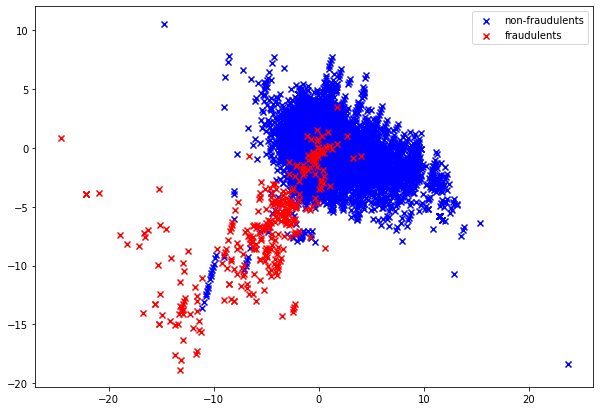

In [35]:
f1 = X_train['V10']
f2 = X_train['V14']
X1 = f1[X_train['Class']==0]
X2 = f1[X_train['Class']==1]
Y1 = f2[X_train['Class']==0]
Y2 = f2[X_train['Class']==1]
plt.figure(figsize=(10,7))
plt.scatter(X1,Y1,marker="x",color='blue');
plt.scatter(X2,Y2,marker="x",color='red')
plt.legend(["non-fraudulents", "fraudulents"])

In [36]:
auctotal = []
features=['V10','V14']
X_train_v = X_train[features]
X_val_v = X_val[features]

In [37]:
auc1014 = []
gm = GaussianMixture(n_components=5)
gm.fit(X_train_v)
p_X_train = gm.score_samples(X_train_v)
p_X_val = gm.score_samples(X_val_v)
train_scores = roc_auc_score(y_train, -1 * p_X_train)
val_scores = roc_auc_score(y_val, -1* p_X_val)
auc1014.append([train_scores,val_scores])
auctotal.append(['V10V14',train_scores,val_scores])

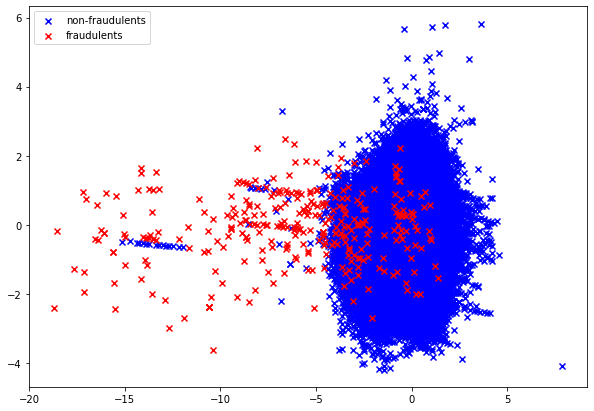

In [38]:
f1 = X_train['V12']
f2 = X_train['V15']
X1 = f1[X_train['Class']==0]
X2 = f1[X_train['Class']==1]
Y1 = f2[X_train['Class']==0]
Y2 = f2[X_train['Class']==1]
plt.figure(figsize=(10,7))
plt.scatter(X1,Y1,marker="x",color='blue');
plt.scatter(X2,Y2,marker="x",color='red')
plt.legend(["non-fraudulents", "fraudulents"])

In [39]:
features=['V12','V15']
X_train_v = X_train[features]
X_val_v = X_val[features]
auc1215 = []
gm = GaussianMixture(n_components=3)
gm.fit(X_train_v)
p_X_train = gm.score_samples(X_train_v)
p_X_val = gm.score_samples(X_val_v)
train_scores = roc_auc_score(y_train, -1 * p_X_train)
val_scores = roc_auc_score(y_val, -1* p_X_val)
auc1215.append([train_scores,val_scores])
auctotal.append(['V12V15',train_scores,val_scores])

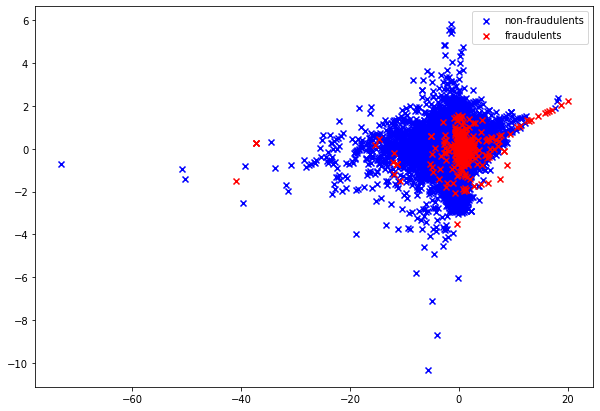

In [40]:
f1 = X_train['V8']
f2 = X_train['V25']
X1 = f1[X_train['Class']==0]
X2 = f1[X_train['Class']==1]
Y1 = f2[X_train['Class']==0]
Y2 = f2[X_train['Class']==1]
plt.figure(figsize=(10,7))
plt.scatter(X1,Y1,marker="x",color='blue');
plt.scatter(X2,Y2,marker="x",color='red')
plt.legend(["non-fraudulents", "fraudulents"])

In [41]:
features=['V8','V25']
X_train_v = X_train[features]
X_val_v = X_val[features]
auc0825 = []
gm = GaussianMixture(n_components=3)
gm.fit(X_train_v)
p_X_train = gm.score_samples(X_train_v)
p_X_val = gm.score_samples(X_val_v)
train_scores = roc_auc_score(y_train, -1 * p_X_train)
val_scores = roc_auc_score(y_val, -1* p_X_val)
auc0825.append([train_scores,val_scores])
auctotal.append(['V18V25',train_scores,val_scores])

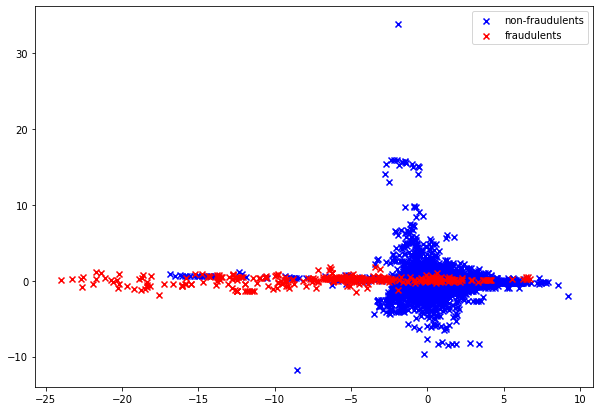

In [42]:
f1 = X_train['V17']
f2 = X_train['V28']
X1 = f1[X_train['Class']==0]
X2 = f1[X_train['Class']==1]
Y1 = f2[X_train['Class']==0]
Y2 = f2[X_train['Class']==1]
plt.figure(figsize=(10,7))
plt.scatter(X1,Y1,marker="x",color='blue');
plt.scatter(X2,Y2,marker="x",color='red')
plt.legend(["non-fraudulents", "fraudulents"])

In [43]:
features=['V17','V28']
X_train_v = X_train[features]
X_val_v = X_val[features]
auc1728 = []
gm = GaussianMixture(n_components=6)
gm.fit(X_train_v)
p_X_train = gm.score_samples(X_train_v)
p_X_val = gm.score_samples(X_val_v)
train_scores = roc_auc_score(y_train, -1 * p_X_train)
val_scores = roc_auc_score(y_val, -1* p_X_val)
auc1728.append([train_scores,val_scores])
auctotal.append(['V17V28',train_scores,val_scores])

In [44]:
auctable = pd.DataFrame(auctotal)
auctable.columns = ['features','AUC train','AUC val']
auctable

,features,AUC train,AUC val
0,V10V14,0.948547,0.962302
1,V12V15,0.914407,0.902878
2,V18V25,0.779910,0.795551
3,V17V28,0.942939,0.929216


In [45]:
features=['V10','V14']
X_train_v = X_train[features]
X_val_v = X_val[features]
gm = GaussianMixture(n_components=5)
gm.fit(X_train_v)
p_X_train = gm.score_samples(X_train_v)
p_X_val = gm.score_samples(X_val_v)
for i in [50,60,70,80,90,93,94,95,96,97,98,99,100,101,102,103,110,120,130,140,150]:
   tr = sorted(p_X_val)[i]
   f1 = f1_score(y_val , p_X_val < tr)
   print('For threshold of ',tr,'f1:','%.3f' %f1)  

For threshold of  -12.433771938861748 f1: 0.421
For threshold of  -11.927857345936498 f1: 0.444
For threshold of  -11.497407154066728 f1: 0.465
For threshold of  -11.326075013768206 f1: 0.462
For threshold of  -11.128647327638314 f1: 0.479
For threshold of  -11.097498143698752 f1: 0.492
For threshold of  -11.091318889702242 f1: 0.500
For threshold of  -11.071705322606938 f1: 0.497
For threshold of  -10.98574763334956 f1: 0.505
For threshold of  -10.983553414694073 f1: 0.503
For threshold of  -10.96863763993018 f1: 0.500
For threshold of  -10.936763800547332 f1: 0.498
For threshold of  -10.934402143635586 f1: 0.495
For threshold of  -10.912730614204433 f1: 0.493
For threshold of  -10.891734722645952 f1: 0.490
For threshold of  -10.839717655304163 f1: 0.488
For threshold of  -10.6413750671964 f1: 0.481
For threshold of  -10.550467496527558 f1: 0.459
For threshold of  -10.473489600687081 f1: 0.457
For threshold of  -10.345456973686844 f1: 0.438
For threshold of  -10.237909637896909 f1: 0.

In [46]:
threshold = -10.984632293504387

In [47]:
X_train_v = X_train_v.reset_index()

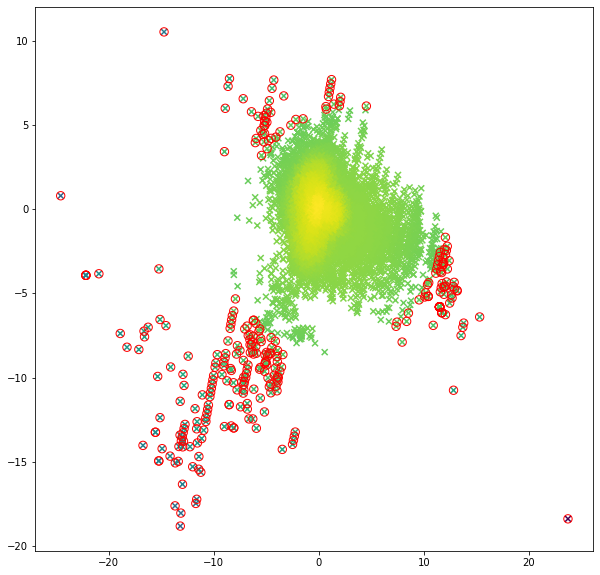

In [48]:
X = X_train_v['V10']
y = X_train_v['V14']
plt.figure(figsize=(10,10))
plt.scatter(X,y,c=p_X_train, cmap='viridis',marker='x')
threshold = -10.984632293504387
outliers = np.nonzero(p_X_train<threshold)[0]
plt.scatter(X[outliers],y[outliers],marker="o",facecolor= "none",edgecolor="r",s=70)
plt.show()

In [49]:
X_val_v = X_val_v.reset_index()
X_val_v

,index,V10,V14
0,242194,0.102371,1.296751
1,84365,0.119216,0.379719
2,83485,0.228213,-1.200233
3,27694,-0.680768,-1.524521
4,74529,-0.156330,0.136394
...,...,...,...
56957,46326,-1.571512,0.177351
56958,214502,0.693161,0.388416
56959,57594,-0.377276,0.022375
56960,4790,-0.785198,0.631775


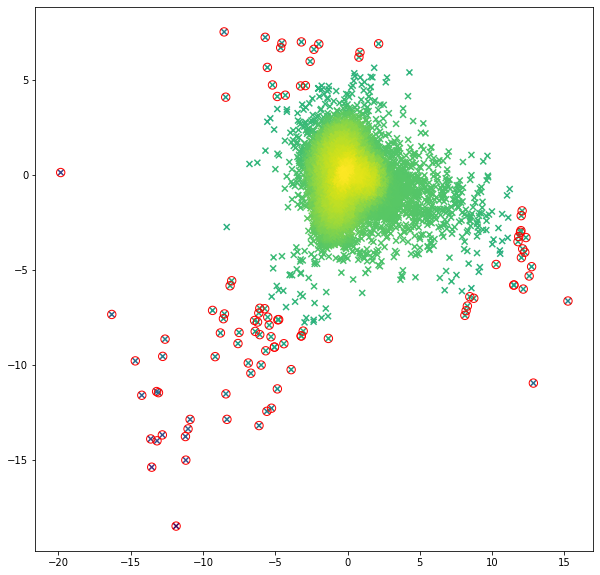

In [50]:
X = X_val_v['V10']
y = X_val_v['V14']
plt.figure(figsize=(10,10))
plt.scatter(X,y,c=p_X_val, cmap='viridis',marker='x')
threshold = -10.984632293504387
outliers = np.nonzero(p_X_val<threshold)[0]
plt.scatter(X[outliers],y[outliers],marker="o",facecolor= "none",edgecolor="r",s=70)
plt.show()

b. 3D plot:

  1. Pick three features (say, f1, f2 and f3, you can choose the features with highest AUC scores from  part 2.) **[0.25]**
  2. Repeat steps 2 to 6. Use the function below for 3D plotting. Use different angles to get a better undrestanding of the plot. **[0.25]**
  3. Find a threshold to maximize your F1 Score on the validation set. **[0.50]** 
  
  Best threshold: -13.485252928004964 f1: 0.478

In [51]:
###You can use the following function for 3D plotting in part b  ###

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

def plot_3d(X_train , y_train, f1, f2, f3, angle ):
  X_train_3f = pd.DataFrame(data = X_train,columns=[f1, f2,f3])
  fig = plt.figure()
  ax = plt.axes( projection='3d')
  ax.scatter3D(X_train_3f[f1][y_train==0], X_train_3f[f2][y_train==0], X_train_3f[f3][y_train==0], c='y', marker='x',label ='Non-fraud')
  ax.scatter3D(X_train_3f[f1][y_train==1], X_train_3f[f2][y_train==1], X_train_3f[f3][y_train==1], c='r', marker='o',label="Fraud")
  ax.set_xlabel(f1)
  ax.set_ylabel(f2)
  ax.set_zlabel(f3)
  plt.legend()
  ax.view_init(30, angle)
  plt.show()


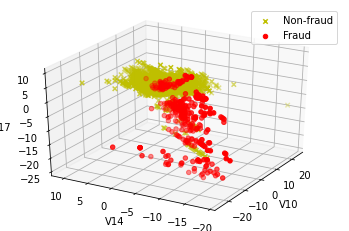

In [52]:
plot_3d(X_train, y_train, f1="V10", f2="V14", f3="V17", angle=210 ) # Replace V0 with desired features. Also, you can try different values of angle to see the plot from different angles

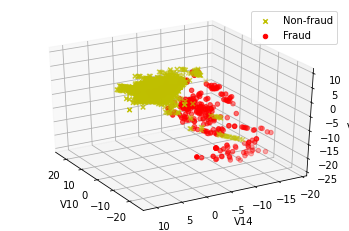

In [53]:
plot_3d(X_train, y_train, f1="V10", f2="V14", f3="V17", angle=150 )

In [54]:
V3 = ['V10','V14','V17']
X_train_3v = X_train[V3]
X_val_3v = X_val[V3]
gm = GaussianMixture(n_components=3)
gm.fit(X_train_3v)
p_X_train = gm.score_samples(X_train_3v)
p_X_val = gm.score_samples(X_val_3v)
train_scores = roc_auc_score(y_train, -1 * p_X_train)
val_scores = roc_auc_score(y_val, -1* p_X_val)
print('auc train=',train_scores,'  auc val= ',val_scores)


auc train= 0.9568189868564679   auc val=  0.9636297959211824


In [55]:
int(len(X_val_3v)*0.001727485630620034)

98

In [56]:
for i in [50,60,70,80,90,93,94,95,96,97,98,99,100,101,102,103,110,120,130,140,150]:
   tr = sorted(p_X_val)[i]
   f1 = f1_score(y_val , p_X_val < tr)
   print('For threshold of ',tr,'f1:','%.3f' %f1)  

For threshold of  -15.706242793095441 f1: 0.434
For threshold of  -14.738499589146707 f1: 0.457
For threshold of  -14.397901557972634 f1: 0.442
For threshold of  -13.935193945685022 f1: 0.451
For threshold of  -13.674754447269079 f1: 0.458
For threshold of  -13.639930413406777 f1: 0.451
For threshold of  -13.639930413406777 f1: 0.451
For threshold of  -13.584656660954286 f1: 0.467
For threshold of  -13.572851967323006 f1: 0.465
For threshold of  -13.5381063222439 f1: 0.462
For threshold of  -13.507130765664185 f1: 0.470
For threshold of  -13.48369830568344 f1: 0.478
For threshold of  -13.479386524118535 f1: 0.475
For threshold of  -13.47755926644848 f1: 0.473
For threshold of  -13.44573792947927 f1: 0.471
For threshold of  -13.443680900423459 f1: 0.468
For threshold of  -13.400694768085337 f1: 0.453
For threshold of  -13.277415198747033 f1: 0.459
For threshold of  -13.177820717485108 f1: 0.474
For threshold of  -13.083045113875752 f1: 0.463
For threshold of  -12.988935816862842 f1: 0.4

## **Part 4:  Two Gaussian model with single feature. [3 Marks]**
Now we will use two separate distributions for fraudulent and non-fraudulent transactions.
  1.  Fit a Gaussian distribution ($G_1$) on a feature of **non-fraudulent transactions** using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. **[0.5]**
  2. Fit another Gaussian distribution ($G_2$) on the same feature but for **fraudulent transactions** using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. **[0.5]**
  3. Compute the score samples ($S$) for both $G_1$ and $G_2$ on the **validation set** to get $S_1$ and $S_2$, respectively. **[0.5]**
  4. Find an optimal $c$ (a real number) that maximizes validation set F1 Score for a model such that if $S_1 < c \times S_2$, the transaction is classified as a fraud. For example, if $c=1$ we could say that if $S_2$ is greater than $S_1$, ($S_1$<$S_2$) then the transaction is a fraud (the transaction belongs to the $G_2$ distribution which represents fraudulent transactions). For start consider $c$ in $[0,10]$ with steps of 0.1, you can change this window in your experiments if needed. **[0.5]**
  5. Repeat the steps above for all the features. What is the best F1 Score, Precision and Recall that you get for training and validation? Which feature and what c? Show your results in a table. **[0.5]**

  V17	f1:0.670157	c:5.9	precision:0.719101	recall:0.627451
  6. Can we report AUC for this model? Why? **[0.5]**

  No, because we have two sample_score s1,s2 for different classes of the train data. The auc of roc takes one sample score to compute.

In [57]:
X_train_c0 = X_train[X_train['Class']==0]
X_train_c1 = X_train[X_train['Class']==1]

In [58]:
features=[f for f in df.columns if 'V' in f]

In [ ]:
c = np.arange(0,10,0.1)
bestf1 = []

for feat in features:
    gm1 = GaussianMixture(n_components=1)
    gm1.fit(X_train_c0.loc[:,X_train.columns == feat])
    gm2 = GaussianMixture(n_components=1)
    gm2.fit(X_train_c1.loc[:,X_train.columns == feat])
    s1 = gm1.score_samples(X_val.loc[:,X_val.columns == feat])
    s2 = gm2.score_samples(X_val.loc[:,X_val.columns == feat])
    allf1 = []
    allc = []
    allprecision = []
    allrecall = []
    for i in c:
      tr = i * s2
      f1 = f1_score(y_val , s1 < tr)
      precision = precision_score(y_val, s1 < tr)
      recall = recall_score(y_val, s1 < tr)
      allf1.append(f1)
      allc.append(i)
      allprecision.append(precision)
      allrecall.append(recall)
    bestf1.append([feat,max(allf1),allc[allf1.index(max(allf1))],allprecision[allf1.index(max(allf1))],allrecall[allf1.index(max(allf1))]])

In [60]:
table_bestf1 = pd.DataFrame(bestf1)
table_bestf1.columns = ['Feature','bestf1','corresponding c','precision','recall']
table_bestf1

,Feature,bestf1,corresponding c,precision,recall
0,V1,0.152381,6.6,0.148148,0.156863
1,V2,0.175439,5.9,0.833333,0.098039
2,V3,0.312139,7.6,0.380282,0.264706
3,V4,0.377358,4.2,0.363636,0.392157
4,V5,0.193939,8.3,0.253968,0.156863
5,V6,0.118812,1.9,0.079470,0.235294
6,V7,0.236967,8.5,0.229358,0.245098
7,V8,0.104167,6.9,0.080645,0.147059
8,V9,0.448980,3.4,0.733333,0.323529
9,V10,0.397590,6.8,0.515625,0.323529


## **Part 5: Multivariate and Mixture of Gaussians Distribution [3 Marks]**
We now want to build an outlier detection model that performs well in terms of F1 score. To design your model, you can benefit from:

*   No restrictions on the number of features - use as few or as many as you want! (multivariate). 
*   To fit your model, you can take advantage of the Gaussian mixture model where you can set the number of components [help](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html) .
*   You can choose to fit your Gaussians on non-fraudulent transactions or to both classes. 


It is up to you how to design your model. Try at least 10 different models and report the AUC for both training and validation sets (if applicable) and the best F1 score, Precision and Recall (after tuning the threshold) for both training and validation sets for each model. What kind of model works better? How many features are best (and which ones)? How many Gaussians? How many components? Summarize your findings with tables or plots. **[3]**

Tried 120 of 2 gaussian model with 2-6 number of features and 1-20 number of components for non-fraud transactions. The best is below.

		number of components for fraud:14	Features:	[V12, V14, V17] bestf1:0.834171	corresponding c:4.8	precision:0.855670	recall:0.813725
**HINT !**

You might want to try a two gaussian model, multiple features, single component for valid transaction and multiple components for fraudulent ones! Why does it make sense to have multiple components for the fraudulent transactions?

The fraudulent transactions distribute more loosely, and have mulitiple clusters.

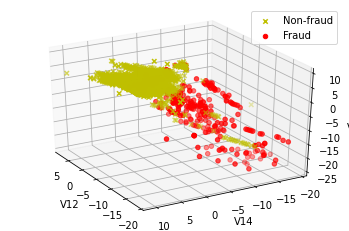

In [74]:
bf3 = ['V12','V14','V17']
plot_3d(X_train, y_train, f1="V12", f2="V14", f3="V17", angle=150 )

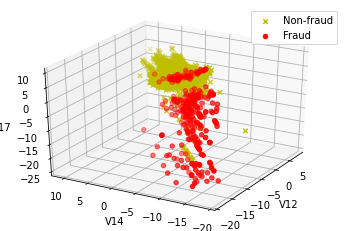

In [75]:
plot_3d(X_train, y_train, f1="V12", f2="V14", f3="V17", angle=210 )

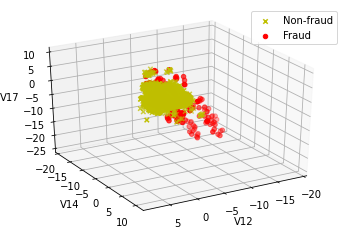

In [76]:
plot_3d(X_train, y_train, f1="V12", f2="V14", f3="V17", angle=60 )

In [102]:
# Two gaussian model, pick 2 best features in part 4, n = 1 to 20 for valid, n =3 for fraudulent.
bf2 = ['V12','V17']
bestf1bf2 = []
gm1 = GaussianMixture(n_components=1)
gm1.fit(X_train_c0[bf2])
for j in range(20):
    gm2 = GaussianMixture(n_components=j+1)
    gm2.fit(X_train_c1[bf2])
    s1 = gm1.score_samples(X_val[bf2])
    s2 = gm2.score_samples(X_val[bf2])
    allf1= []
    allc = []
    allprecision = []
    allrecall = []
    for i in c:
        tr = i * s2
        f1 = f1_score(y_val , s1 < tr)
        precision = precision_score(y_val, s1 < tr)
        recall = recall_score(y_val, s1 < tr)
        allf1.append(f1)
        allc.append(i)
        allprecision.append(precision)
        allrecall.append(recall)
    bestf1bf2.append([j+1,bf2,max(allf1),allc[allf1.index(max(allf1))],allprecision[allf1.index(max(allf1))],allrecall[allf1.index(max(allf1))]])

In [135]:
table_bestf1bf2 = pd.DataFrame(bestf1bf2)
table_bestf1bf2.columns = ['number of components for fraud','Feature','bestf1','corresponding c','precision','recall']
table_bestf1bf2

,number of components for fraud,Feature,bestf1,corresponding c,precision,recall
0,1,"[V12, V17]",0.700508,4.5,0.726316,0.676471
1,2,"[V12, V17]",0.707692,4.5,0.741935,0.676471
2,3,"[V12, V17]",0.737430,5.1,0.857143,0.647059
3,4,"[V12, V17]",0.705882,4.8,0.776471,0.647059
4,5,"[V12, V17]",0.717391,5.0,0.804878,0.647059
5,6,"[V12, V17]",0.724490,4.1,0.755319,0.696078
6,7,"[V12, V17]",0.723164,5.3,0.853333,0.627451
7,8,"[V12, V17]",0.713514,5.2,0.795181,0.647059
8,9,"[V12, V17]",0.717391,5.1,0.804878,0.647059
9,10,"[V12, V17]",0.733333,5.0,0.846154,0.647059


In [99]:
# Two gaussian model, pick 3 best features in part 4, n = 1 to 20 for valid, n =3 for fraudulent.
bf3 = ['V12','V14','V17']
bestf1bf3 = []
gm1 = GaussianMixture(n_components=1)
gm1.fit(X_train_c0[bf3])
for j in range(20):
    gm2 = GaussianMixture(n_components=j+1)
    gm2.fit(X_train_c1[bf3])
    s1 = gm1.score_samples(X_val[bf3])
    s2 = gm2.score_samples(X_val[bf3])
    allf1= []
    allc = []
    allprecision = []
    allrecall = []
    for i in c:
        tr = i * s2
        f1 = f1_score(y_val , s1 < tr)
        precision = precision_score(y_val, s1 < tr)
        recall = recall_score(y_val, s1 < tr)
        allf1.append(f1)
        allc.append(i)
        allprecision.append(precision)
        allrecall.append(recall)
    bestf1bf3.append([j+1,bf3,max(allf1),allc[allf1.index(max(allf1))],allprecision[allf1.index(max(allf1))],allrecall[allf1.index(max(allf1))]])

In [136]:
table_bestf1bf3 = pd.DataFrame(bestf1bf3)
table_bestf1bf3.columns = ['number of components for fraud','Feature','bestf1','corresponding c','precision','recall']
table_bestf1bf3

,number of components for fraud,Feature,bestf1,corresponding c,precision,recall
0,1,"[V12, V14, V17]",0.797814,6.9,0.901235,0.715686
1,2,"[V12, V14, V17]",0.789189,7.2,0.879518,0.715686
2,3,"[V12, V14, V17]",0.802139,6.8,0.882353,0.735294
3,4,"[V12, V14, V17]",0.806452,7.1,0.892857,0.735294
4,5,"[V12, V14, V17]",0.795699,7.4,0.880952,0.725490
5,6,"[V12, V14, V17]",0.795699,7.4,0.880952,0.725490
6,7,"[V12, V14, V17]",0.795918,5.8,0.829787,0.764706
7,8,"[V12, V14, V17]",0.797980,5.6,0.822917,0.774510
8,9,"[V12, V14, V17]",0.795699,7.4,0.880952,0.725490
9,10,"[V12, V14, V17]",0.797927,6.0,0.846154,0.754902


In [95]:
# best 4 featrues from part 4, n = 1 to 20 for fraud trans
bf4 = ['V12','V14','V17','V11']
bestf1bf4 = []
gm1 = GaussianMixture(n_components=1)
gm1.fit(X_train_c0[bf4])
for j in range(20):
    gm2 = GaussianMixture(n_components=j+1)
    gm2.fit(X_train_c1[bf4])
    s1 = gm1.score_samples(X_val[bf4])
    s2 = gm2.score_samples(X_val[bf4])
    allf1= []
    allc = []
    allprecision = []
    allrecall = []
    for i in c:
        tr = i * s2
        f1 = f1_score(y_val , s1 < tr)
        precision = precision_score(y_val, s1 < tr)
        recall = recall_score(y_val, s1 < tr)
        allf1.append(f1)
        allc.append(i)
        allprecision.append(precision)
        allrecall.append(recall)
    bestf1bf4.append([j+1,bf4,max(allf1),allc[allf1.index(max(allf1))],allprecision[allf1.index(max(allf1))],allrecall[allf1.index(max(allf1))]])

In [137]:
table_bestf1bf4 = pd.DataFrame(bestf1bf4)
table_bestf1bf4.columns = ['number of components for fraud','Feature','bestf1','corresponding c','precision','recall']
table_bestf1bf4

,number of components for fraud,Feature,bestf1,corresponding c,precision,recall
0,1,"[V12, V14, V17, V11]",0.800000,6.8,0.891566,0.725490
1,2,"[V12, V14, V17, V11]",0.797814,7.5,0.901235,0.715686
2,3,"[V12, V14, V17, V11]",0.819149,6.2,0.895349,0.754902
3,4,"[V12, V14, V17, V11]",0.812834,6.4,0.894118,0.745098
4,5,"[V12, V14, V17, V11]",0.816327,5.7,0.851064,0.784314
5,6,"[V12, V14, V17, V11]",0.810000,5.5,0.826531,0.794118
6,7,"[V12, V14, V17, V11]",0.810000,5.4,0.826531,0.794118
7,8,"[V12, V14, V17, V11]",0.816327,5.5,0.851064,0.784314
8,9,"[V12, V14, V17, V11]",0.810000,5.4,0.826531,0.794118
9,10,"[V12, V14, V17, V11]",0.820513,5.5,0.860215,0.784314


In [131]:
# Try using best 5 features (high f1 in part 4) for 2 gaussian model, n from 1 to 20 for fraud transactions

bf5 = ['V12','V14','V17','V11','V16']
bestf1bf5 = []
gm1 = GaussianMixture(n_components=1)
gm1.fit(X_train_c0[bf5])
for j in range(20):
    gm2 = GaussianMixture(n_components=j+1)
    gm2.fit(X_train_c1[bf5])
    s1 = gm1.score_samples(X_val[bf5])
    s2 = gm2.score_samples(X_val[bf5])
    allf1= []
    allc = []
    allprecision = []
    allrecall = []
    for i in c:
        tr = i * s2
        f1 = f1_score(y_val , s1 < tr)
        precision = precision_score(y_val, s1 < tr)
        recall = recall_score(y_val, s1 < tr)
        allf1.append(f1)
        allc.append(i)
        allprecision.append(precision)
        allrecall.append(recall)
    bestf1bf5.append([j+1,bf5,max(allf1),allc[allf1.index(max(allf1))],allprecision[allf1.index(max(allf1))],allrecall[allf1.index(max(allf1))]])

In [133]:
table_bestf1bf5 = pd.DataFrame(bestf1bf5)
table_bestf1bf5.columns = ['number of components for fraud','Feature','bestf1','corresponding c','precision','recall']
table_bestf1bf5

,number of components for fraud,Feature,bestf1,corresponding c,precision,recall
0,1,"[V12, V14, V17, V11, V16]",0.785340,7.1,0.842697,0.735294
1,2,"[V12, V14, V17, V11, V16]",0.797814,8.1,0.901235,0.715686
2,3,"[V12, V14, V17, V11, V16]",0.795812,7.1,0.853933,0.745098
3,4,"[V12, V14, V17, V11, V16]",0.810526,6.7,0.875000,0.754902
4,5,"[V12, V14, V17, V11, V16]",0.812183,5.9,0.842105,0.784314
5,6,"[V12, V14, V17, V11, V16]",0.814815,6.4,0.885057,0.754902
6,7,"[V12, V14, V17, V11, V16]",0.812500,6.1,0.866667,0.764706
7,8,"[V12, V14, V17, V11, V16]",0.814433,6.2,0.858696,0.774510
8,9,"[V12, V14, V17, V11, V16]",0.810526,6.7,0.875000,0.754902
9,10,"[V12, V14, V17, V11, V16]",0.812500,6.1,0.866667,0.764706


In [97]:
# Try using best 6 features (high f1 in part 4) for 2 gaussian model, n from 1 to 20 for fraud transactions

bf6 = ['V12','V14','V17','V11','V16','V18']
bestf1bf6 = []
gm1 = GaussianMixture(n_components=1)
gm1.fit(X_train_c0[bf6])
for j in range(20):
    gm2 = GaussianMixture(n_components=j+1)
    gm2.fit(X_train_c1[bf6])
    s1 = gm1.score_samples(X_val[bf6])
    s2 = gm2.score_samples(X_val[bf6])
    allf1= []
    allc = []
    allprecision = []
    allrecall = []
    for i in c:
        tr = i * s2
        f1 = f1_score(y_val , s1 < tr)
        precision = precision_score(y_val, s1 < tr)
        recall = recall_score(y_val, s1 < tr)
        allf1.append(f1)
        allc.append(i)
        allprecision.append(precision)
        allrecall.append(recall)
    bestf1bf6.append([j+1,bf6,max(allf1),allc[allf1.index(max(allf1))],allprecision[allf1.index(max(allf1))],allrecall[allf1.index(max(allf1))]])

In [132]:
table_bestf1bf6 = pd.DataFrame(bestf1bf6)
table_bestf1bf6.columns = ['number of components for fraud','Feature','bestf1','corresponding c','precision','recall']
table_bestf1bf6

,number of components for fraud,Feature,bestf1,corresponding c,precision,recall
0,1,"[V12, V14, V17, V11, V16, V18]",0.772277,6.3,0.780000,0.764706
1,2,"[V12, V14, V17, V11, V16, V18]",0.785714,6.6,0.819149,0.754902
2,3,"[V12, V14, V17, V11, V16, V18]",0.810256,5.9,0.849462,0.774510
3,4,"[V12, V14, V17, V11, V16, V18]",0.810256,5.9,0.849462,0.774510
4,5,"[V12, V14, V17, V11, V16, V18]",0.816327,6.1,0.851064,0.784314
5,6,"[V12, V14, V17, V11, V16, V18]",0.810256,6.4,0.849462,0.774510
6,7,"[V12, V14, V17, V11, V16, V18]",0.812500,6.3,0.866667,0.764706
7,8,"[V12, V14, V17, V11, V16, V18]",0.816327,5.8,0.851064,0.784314
8,9,"[V12, V14, V17, V11, V16, V18]",0.816754,6.3,0.876404,0.764706
9,10,"[V12, V14, V17, V11, V16, V18]",0.814433,6.1,0.858696,0.774510


In [ ]:
features

In [109]:
# Try using all features for 2 gaussian model, n from 1 to 20 for fraud transactions

bestf1allf = []
gm1 = GaussianMixture(n_components=1)
gm1.fit(X_train_c0[features])
for j in range(20):
    gm2 = GaussianMixture(n_components=j+1)
    gm2.fit(X_train_c1[features])
    s1 = gm1.score_samples(X_val[features])
    s2 = gm2.score_samples(X_val[features])
    allf1= []
    allc = []
    allprecision = []
    allrecall = []
    for i in c:
        tr = i * s2
        f1 = f1_score(y_val , s1 < tr)
        precision = precision_score(y_val, s1 < tr)
        recall = recall_score(y_val, s1 < tr)
        allf1.append(f1)
        allc.append(i)
        allprecision.append(precision)
        allrecall.append(recall)
    bestf1allf.append([j+1,features,max(allf1),allc[allf1.index(max(allf1))],allprecision[allf1.index(max(allf1))],allrecall[allf1.index(max(allf1))]])

In [110]:
table_bestf1allf = pd.DataFrame(bestf1allf)
table_bestf1allf.columns = ['number of components for fraud','Feature','bestf1','corresponding c','precision','recall']
table_bestf1allf

,number of components for fraud,Feature,bestf1,corresponding c,precision,recall
0,1,"[V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11,...",0.753769,6.6,0.773196,0.735294
1,2,"[V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11,...",0.781250,6.5,0.833333,0.735294
2,3,"[V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11,...",0.781250,6.8,0.833333,0.735294
3,4,"[V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11,...",0.783505,7.9,0.826087,0.745098
4,5,"[V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11,...",0.810811,5.6,0.903614,0.735294
5,6,"[V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11,...",0.800000,5.8,0.891566,0.725490
6,7,"[V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11,...",0.793651,5.4,0.862069,0.735294
7,8,"[V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11,...",0.817204,5.6,0.904762,0.745098
8,9,"[V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11,...",0.793651,6.7,0.862069,0.735294
9,10,"[V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11,...",0.810811,5.7,0.903614,0.735294


In [142]:
# summarize all 2 gaussian models with n = 1 to 20, features from best 2 to best 6 and all features
summary = pd.concat([table_bestf1bf2,table_bestf1bf3,table_bestf1bf4,table_bestf1bf5,table_bestf1bf6,table_bestf1allf])
summary = summary.reset_index()
summary.sort_values(by='bestf1', ascending=False)

,index,number of components for fraud,Feature,bestf1,corresponding c,precision,recall
33,13,14,"[V12, V14, V17]",0.834171,4.8,0.855670,0.813725
57,17,18,"[V12, V14, V17, V11]",0.832487,4.5,0.863158,0.803922
95,15,16,"[V12, V14, V17, V11, V16, V18]",0.830769,5.3,0.870968,0.794118
97,17,18,"[V12, V14, V17, V11, V16, V18]",0.830769,5.3,0.870968,0.794118
38,18,19,"[V12, V14, V17]",0.830000,4.6,0.846939,0.813725
...,...,...,...,...,...,...,...
7,7,8,"[V12, V17]",0.713514,5.2,0.795181,0.647059
1,1,2,"[V12, V17]",0.707692,4.5,0.741935,0.676471
3,3,4,"[V12, V17]",0.705882,4.8,0.776471,0.647059
0,0,1,"[V12, V17]",0.700508,4.5,0.726316,0.676471


## **Part 6: Evaluating performance on test set: [1 Mark]**
**Which model worked better?** Pick your best model among all models and apply it to your test set. Report the F1 Score, Precision and Recall on the test set. **[1]**


In [144]:
X_test.insert(1, "Class", y_test, True)
X_test_c0 = X_test[X_test['Class']==0]
X_test_c1 = X_test[X_test['Class']==1]

In [147]:
#   number of components for fraud:14    Features:    [V12, V14, V17] bestf1:0.834171    corresponding c:4.8    precision:0.855670    recall:0.813725
bf3 = ['V12', 'V14', 'V17']
bestmodel = []
gm1 = GaussianMixture(n_components=1)
gm1.fit(X_test[bf3])
gm2 = GaussianMixture(n_components=14)
gm2.fit(X_test[bf3])
s1 = gm1.score_samples(X_test[bf3])
s2 = gm2.score_samples(X_test[bf3])
c = 4.8
tr = c * s2
f1 = f1_score(y_test , s1 < tr)
precision = precision_score(y_test, s1 < tr)
recall = recall_score(y_test, s1 < tr)
bestmodel.append([bf3,f1,c,precision,recall])
table_bestmodel = pd.DataFrame(bestmodel)
table_bestmodel.columns = ['Feature','Finalf1','corresponding c','precision','recall']
table_bestmodel

,Feature,Finalf1,corresponding c,precision,recall
0,"[V12, V14, V17]",0.75,4.8,0.865385,0.661765
